In [1]:
from smartbase.smartbase import SmartBase
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.offline

In [2]:
def rodlinetuple(rodname):
     if "A" in rodname:
        return int(1)
     if "D" in rodname:
        return int(3)
     if "B" in rodname:
        return int(2) 


In [3]:
def backtolevel(Fullres):
    newcols = []
    for col in Fullres.columns:
        if type(col) is tuple:
            newcols.append(col[0])
        else:
            newcols.append(col)
    Fullres.columns = newcols
#    Fullres.columns = [col[0] for col in Fullres.columns.values]
    return Fullres

In [4]:
def forwardtolevel(Fullres):
    newcols = []
    for col in Fullres.columns:
        if type(col) is tuple:
            newcols.append(col)
        else:
            newcols.append((col, ""))
    Fullres.columns = newcols
#    Fullres.columns = [col[0] for col in Fullres.columns.values]
    return Fullres

In [5]:
def forwardtolevel3(Fullres):
    newcols = []
    for col in Fullres.columns.values:
        if type(col) is tuple:
            newcols.append((col[0], col[1], ""))
        else:
            newcols.append((col, "", ""))
    print(newcols)
    Fullres.columns = newcols
#    Fullres.columns = [col[0] for col in Fullres.columns.values]
    return Fullres

In [6]:
def parttolevel3(Fullres):
    newcols = []
    for col in Fullres.columns.values:
        if len(col) == 2:
            newcols.append((col[0], col[1], ""))
        else:
            newcols.append(col)
    print(newcols)
    Fullres.columns = newcols
#    Fullres.columns = [col[0] for col in Fullres.columns.values]
    return Fullres

In [7]:
def rodchose(x):
    if type(x) is str:
        if len(x) == len('CK002200-D221118-2'):
            return x[:-2]
        else:
            return x[:-4]
    else:
        return "Unknown"

In [8]:
def droprep(DF):
    droparr = []
    for i in range(len(DF.columns.values)):
        for j in range(len(DF.columns.values)):
            if (DF.columns.values[i] == DF.columns.values[j]) and (i != j):
                droparr.append(DF.columns.values[i])
    DF = DF.drop(columns=droparr)
    return DF

In [9]:
def stayonly(DF, staylist):
    droparr = []
    for i in range(len(DF.columns.values)):
        if DF.columns.values[i] not in staylist:
            droparr.append(DF.columns.values[i])
    DF = DF.drop(columns=droparr)
    return DF

Подключение к смартбейс и формирование выборки. Много кода. Просто Run All и все.

In [10]:
url = "http://smartbase"
sb = SmartBase(login="21362", password = 'steambiribiri83', host=url, save_credential=False)

In [11]:
#VKhist = sb.get_table(110)
counthist = sb.get_table(427)
tmeas = sb.get_table(428)
tvol = sb.get_table(209)
t = sb.get_table(208)
sv = sb.get_table(207)
trod = sb.get_table(103)
rodPK = sb.get_table(94)
zagPK = sb.get_table(183)

Getting structure of table #427... done (0:00:00.895369)
Creating flat view of table structure #427... done (0:00:02.659472)
Getting table #427... Download data for table #427... done (0:00:11.962471)


D:\anaconda3\lib\site-packages\smartbase\smartbase.py:1247: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



done (0:00:28.857845)
Getting structure of table #428... done (0:00:00.971644)
Creating flat view of table structure #428... done (0:00:00.100048)
Getting table #428... Download data for table #428... done (0:00:16.340597)
done (0:00:25.055080)
Getting structure of table #209... done (0:00:00.466339)
Creating flat view of table structure #209... done (0:00:02.603800)
Getting table #209... Download data for table #209... done (0:00:01.635435)
done (0:00:02.849208)
Getting structure of table #208... done (0:00:01.187160)
Creating flat view of table structure #208... done (0:00:02.037964)
Getting table #208... Download data for table #208... done (0:00:02.208243)
done (0:00:03.511831)
Getting structure of table #207... done (0:00:00.579331)
Creating flat view of table structure #207... done (0:00:00.917329)
Getting table #207... Download data for table #207... done (0:00:01.060032)
done (0:00:01.901747)
Getting structure of table #103... done (0:00:00.892762)
Creating flat view of table s

In [12]:
countdata = counthist.df
tdatavol = tvol.df
tdata = t.df
tdatarod = trod.df
measdata = tmeas.df
sverldata = sv.df
PKdatarod = rodPK.df
PKdatazag = zagPK.df

In [13]:
countdata = counthist.data.loc[counthist.data.index>=70000]
countdata = countdata[(countdata["Тип волокна"] == "Панда ПС 152/2015") & (countdata["Статус"] == "Годное") & (countdata["Длина, м"] > 0)]
tmeasdata = tmeas.data.loc[tmeas.data.index>=40000]

In [14]:
countdata = stayonly(countdata, [("№ Контура", ""), ("Длина, м", ""), ("Измерение внутреннего конца", ""), ("Измерение наружного конца", "")])
countdata

,№ Контура,"Длина, м",Измерение внутреннего конца,Измерение наружного конца
,,,,
SysId,,,,
70890,PS000907-A170828-1/1-1,1200,18683,18684
70892,PS000907-A170828-1/1-2,1200,18685,18686
70894,PS000907-A170828-1/1-3,1010,18687,18688
70897,PS000907-A170818-1/1-4-1,1200,18691,18690
70939,PS000907-A170828-2/1-2,1200,18713,18714
...,...,...,...,...
110908,PS001184-A081020-3/1-1,1200,37305,37306
110910,PS001184-A081020-3/1-3,1100,37307,37308


In [15]:
measdatavn = measdata.drop(columns = [('Файлы данных', '', ''),
                                    ('Номер замера', '', ''),
                                    ('Системные столбцы', 'Дата вставки', ''),
                                    ('Системные столбцы', 'Редактор', ''),
                                    ('Системные столбцы', 'Дата изменения', ''),
                                    ('Примечание', '', ''),
                                    ('ЗУП1', 'Index', ''),
                                    ('ЗУП1', 'Min_wall', ''),
                                    ('ЗУП1', 'Max_wall', ''),
                                    ('ЗУП2', 'Index', ''),
                                    ('ЗУП2', 'Min_wall', ''),
                                    ('ЗУП2', 'Max_wall', ''),
                                    ('ДМП@ 1,31', 'Питерм', ''),
                                    ('ДМП@ 1,31', 'Гаусс', ''),
                                    ('Затухание, дБ|км', 'Рефлектометр', '1310'),
                                    ('Затухание, дБ|км', 'Рефлектометр', '1550'),
                                    ('Затухание, дБ|км', 'PK-2500', '1310'),
                                    ('Затухание, дБ|км', 'PK-2500', '1383'),
                                    ('Затухание, дБ|км', 'PK-2500', '1550'),
                                    ('Геометрия', 'Номер измерения', ''),
                                    ('Системные столбцы', 'Создатель', '')
                                   ])

In [16]:
newcols = forwardtolevel3(countdata)
blah = pd.MultiIndex.from_tuples(newcols)
countdata.columns = blah

[('№ Контура', '', ''), ('Длина, м', '', ''), ('Измерение внутреннего конца', '', ''), ('Измерение наружного конца', '', '')]


In [17]:
mergedvn = pd.merge(left = countdata, right = measdatavn, left_on = "Измерение внутреннего конца", right_on = '№ измерения')

In [18]:
mergedvn.index = countdata.index

In [19]:
measdatanar = measdata.drop(columns = [('Файлы данных', '', ''),
                                    ('Номер замера', '', ''),
                                    ('Системные столбцы', 'Дата вставки', ''),
                                    ('Системные столбцы', 'Редактор', ''),
                                    ('Системные столбцы', 'Дата изменения', ''),
                                    ('Примечание', '', ''),
                                    ('ЗУП1', 'Index', ''),
                                    ('ЗУП1', 'Min_wall', ''),
                                    ('ЗУП1', 'Max_wall', ''),
                                    ('ЗУП2', 'Index', ''),
                                    ('ЗУП2', 'Min_wall', ''),
                                    ('ЗУП2', 'Max_wall', ''),
                                    ('ДМП@ 1,31', 'Питерм', ''),
                                    ('ДМП@ 1,31', 'Гаусс', ''),
                                    ('Затухание, дБ|км', 'Рефлектометр', '1310'),
                                    ('Затухание, дБ|км', 'Рефлектометр', '1550'),
                                    ('Геометрия', 'Номер измерения', ''),
                                    ('Системные столбцы', 'Создатель', '')
                                   ])

In [20]:
mergednar = pd.merge(left = countdata, right = measdatanar, left_on = "Измерение наружного конца", right_on = '№ измерения')
mergednar.index = countdata.index

In [21]:
mergedmean = countdata.copy()
for i in range(len(mergedmean.columns.values) + 1, len(mergedvn.columns.values)):
    print(mergedvn.columns.values[i])
    mergedmean[mergedvn.columns.values[i]] = (mergedvn[mergedvn.columns.values[i]] + mergednar[mergedvn.columns.values[i]]) / 2   

('Отсечка, мкм', '', '')
('ДМП@ 1,55', 'Питерм', '')
('ДМП@ 1,55', 'Гаусс', '')
('Геометрия', 'Ø, мкм', 'ЗУП-1')
('Геометрия', 'Ø, мкм', 'Кварц')
('Геометрия', 'Ø, мкм', 'ЗУП-2')
('Геометрия', 'Ø, мкм', 'Сердц')
('Геометрия', 'Некруглость, %', 'Кварц')
('Геометрия', 'Некруглость, %', 'ЗУП-2')
('Геометрия', 'Некруглость, %', 'Сердц')
('Геометрия', 'Конц-сть, мкм', 'ЗУП-2')
('Геометрия', 'Конц-сть, мкм', 'Сердц')
('Геометрия', 'Ø, мкм.', 'Ст1')
('Геометрия', 'Ø, мкм.', 'Ст2')
('Геометрия', 'Некр.,%', 'Ст1')
('Геометрия', 'Некр.,%', 'Ст2')
('Геометрия', 'Конц., мкм', 'Ст1')
('Геометрия', 'Конц., мкм', 'Ст2')
('Геометрия', 'Планарность, мкм', 'К кварц')
('Геометрия', 'Планарность, мкм', 'К сердц')
('В* 10-4', '', '')
('h* 10-5', '', '')


In [22]:
resultdf = mergedmean.copy()

In [23]:
resultdf["Номер заготовки"] = resultdf["№ Контура"].apply(lambda x: x.split("/")[0])

In [24]:
mergeddfzag = pd.merge(resultdf,
                    tdata, 
                    right_on='№ Части заготовки',
                    left_on="Номер заготовки"
                    )
mergeddfzag = droprep(mergeddfzag)
mergeddfzag
#print(mergeddfzag.columns.values.tolist())
mergeddfzag = stayonly(mergeddfzag, resultdf.columns.values.tolist() + [('Параметры стержня 1', 'Код стержня для канала 1'),
                                                                        ('Параметры стержня 2', 'Код стержня для канала 2'),
                                                                        ('Параметры стержня 1', 'Диаметр стержня минимум'),
                                                                        ('Параметры стержня 1', 'Диаметр стержня максимум'),
                                                                        ('Параметры стержня 1', 'Диаметр легированного слоя минимум'),
                                                                        ('Параметры стержня 1', 'Диаметр легированного слоя максимум'),
                                                                        ('Параметры стержня 2', 'Диаметр стержня минимум'),
                                                                        ('Параметры стержня 2', 'Диаметр стержня максимум'),
                                                                        ('Параметры стержня 2', 'Диаметр легированного слоя минимум'),
                                                                        ('Параметры стержня 2', 'Диаметр легированного слоя максимум'),
                                                                        ('Травление 3 в ванне  (HF + HNO3) ( для заготовки+ вспом. конец + держатель)', 'Диаметр канала 1 в заготовке итоговый'),
                                                                        ('Травление 3 в ванне  (HF + HNO3) ( для заготовки+ вспом. конец + держатель)', 'Диаметр канала 2 в заготовке итоговый')])

D:\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning:

merging between different levels can give an unintended result (3 levels on the left, 2 on the right)



In [25]:
mergeddfzag[("Стержень 1", "", "")] = mergeddfzag[('Параметры стержня 1', 'Код стержня для канала 1')].apply(rodchose)
mergeddfzag[("Стержень 2", "", "")] = mergeddfzag[('Параметры стержня 2', 'Код стержня для канала 2')].apply(rodchose)
mergeddfzag[("Диаметр стержня ср.", "", "")] = (mergeddfzag[('Параметры стержня 1', 'Диаметр стержня минимум')] + mergeddfzag[('Параметры стержня 1', 'Диаметр стержня максимум')])/2
mergeddfzag[("Диаметр стержня 1 ср.", "", "")] = (mergeddfzag[('Параметры стержня 1', 'Диаметр стержня минимум')] + mergeddfzag[('Параметры стержня 1', 'Диаметр стержня максимум')])/2
mergeddfzag[("Диаметр стержня 2 ср.", "", "")] = (mergeddfzag[('Параметры стержня 2', 'Диаметр стержня минимум')] + mergeddfzag[('Параметры стержня 2', 'Диаметр стержня максимум')])/2

mergeddfzag[("Диаметр легированной части стержня 1 ср.", "", "")] = (mergeddfzag[('Параметры стержня 1', 'Диаметр легированного слоя минимум')] + mergeddfzag[('Параметры стержня 1', 'Диаметр легированного слоя максимум')])/2
mergeddfzag[("Диаметр легированной части стержня 2 ср.", "", "")] = (mergeddfzag[('Параметры стержня 2', 'Диаметр легированного слоя минимум')] + mergeddfzag[('Параметры стержня 2', 'Диаметр легированного слоя максимум')])/2
mergeddfzag[("Диаметр канала", "", "")] = mergeddfzag[('Травление 3 в ванне  (HF + HNO3) ( для заготовки+ вспом. конец + держатель)', 'Диаметр канала 1 в заготовке итоговый')]
mergeddfzag[("Диаметр канала 1", "", "")] = mergeddfzag[('Травление 3 в ванне  (HF + HNO3) ( для заготовки+ вспом. конец + держатель)', 'Диаметр канала 2 в заготовке итоговый')]
mergeddfzag[("Диаметр канала 2", "", "")] = mergeddfzag[('Травление 3 в ванне  (HF + HNO3) ( для заготовки+ вспом. конец + держатель)', 'Диаметр канала 2 в заготовке итоговый')]
#mergeddfzag[("Диаметр легированной части 1", "", "")] = mergeddfzag[('Травление 3 в ванне  (HF + HNO3) ( для заготовки+ вспом. конец + держатель)', 'Диаметр канала 2 в заготовке итоговый')]

#mergeddfzag["Диаметр стержня ср."] = mergeddfzag["Диаметр стержня ср."].apply(lambda x: x.replace(",", "") if "," in str(x) else x)
mergeddfzag[("Диаметр канала", "", "")] = mergeddfzag[("Диаметр канала", "", "")].apply(lambda x: x/1000 if x > 1000 else x)
mergeddfzag[("Диаметр канала 1", "", "")] = mergeddfzag[("Диаметр канала", "", "")].apply(lambda x: x/1000 if x > 1000 else x)
mergeddfzag[("Диаметр канала 2", "", "")] = mergeddfzag[("Диаметр канала", "", "")].apply(lambda x: x/1000 if x > 1000 else x)
mergeddfzag = mergeddfzag.drop(columns = [('Параметры стержня 1', 'Код стержня для канала 1'),
                                          ('Параметры стержня 2', 'Код стержня для канала 2'),
                                          ('Параметры стержня 1', 'Диаметр стержня минимум'),
                                          ('Параметры стержня 1', 'Диаметр стержня максимум'),
                                          ('Параметры стержня 1', 'Диаметр легированного слоя минимум'),
                                          ('Параметры стержня 1', 'Диаметр легированного слоя максимум'),
                                          ('Параметры стержня 2', 'Диаметр стержня минимум'),
                                          ('Параметры стержня 2', 'Диаметр стержня максимум'),  
                                          ('Параметры стержня 2', 'Диаметр легированного слоя минимум'),
                                          ('Параметры стержня 2', 'Диаметр легированного слоя максимум'),
                                          ('Травление 3 в ванне  (HF + HNO3) ( для заготовки+ вспом. конец + держатель)', 'Диаметр канала 1 в заготовке итоговый'),
                                          ('Травление 3 в ванне  (HF + HNO3) ( для заготовки+ вспом. конец + держатель)', 'Диаметр канала 2 в заготовке итоговый')])

In [26]:
mergeddfzag

,"(№ Контура, , )","(Длина, м, , )","(Измерение внутреннего конца, , )","(Измерение наружного конца, , )","(Отсечка, мкм, , )","(ДМП@ 1,55, Питерм, )","(ДМП@ 1,55, Гаусс, )","(Геометрия, Ø, мкм, ЗУП-1)","(Геометрия, Ø, мкм, Кварц)","(Геометрия, Ø, мкм, ЗУП-2)",...,"(Стержень 1, , )","(Стержень 2, , )","(Диаметр стержня ср., , )","(Диаметр стержня 1 ср., , )","(Диаметр стержня 2 ср., , )","(Диаметр легированной части стержня 1 ср., , )","(Диаметр легированной части стержня 2 ср., , )","(Диаметр канала, , )","(Диаметр канала 1, , )","(Диаметр канала 2, , )"
0,PS000907-A170828-1/1-1,1200,18683,18684,1439.495,7.31860,7.69575,131.730,80.890,166.935,...,CK002200-D221118,CK002200-D221118,7.1475,7.1475,7.1650,5.705,5.715,7.2480,7.2480,7.2480
1,PS000907-A170828-1/1-2,1200,18685,18686,1408.405,7.29420,7.65800,131.795,80.915,166.900,...,CK002200-D221118,CK002200-D221118,7.1475,7.1475,7.1650,5.705,5.715,7.2480,7.2480,7.2480
2,PS000907-A170828-1/1-3,1010,18687,18688,1396.790,7.29820,7.64790,131.920,81.055,166.990,...,CK002200-D221118,CK002200-D221118,7.1475,7.1475,7.1650,5.705,5.715,7.2480,7.2480,7.2480
3,PS000907-A170828-2/1-2,1200,18713,18714,1392.685,7.29255,7.62945,132.225,80.735,166.730,...,CK002202-A261118,CK002202-A261118,7.1515,7.1515,7.1510,5.690,5.690,7.2520,7.2520,7.2520
4,PS000815-A140817-2/1-2,1200,18728,18729,1413.140,7.15645,7.48920,131.975,80.780,167.380,...,CK002182-D280918,CK002199-D211118,7.1475,7.1475,7.1475,5.690,5.715,7.2485,7.2485,7.2485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,PS001184-A081020-3/1-1,1200,37305,37306,1356.020,7.29375,7.63315,131.140,81.420,167.770,...,CK003072-A281020,CK003079-A301020,7.1870,7.1870,7.1870,5.710,5.710,NaN,NaN,NaN
1878,PS001184-A081020-3/1-3,1100,37307,37308,1354.755,7.24905,7.60595,131.230,81.105,166.740,...,CK003072-A281020,CK003079-A301020,7.1870,7.1870,7.1870,5.710,5.710,NaN,NaN,NaN
1879,PS001184-A081020-3/1-4,1100,37309,37310,1358.610,7.26635,7.61475,131.470,81.115,166.425,...,CK003072-A281020,CK003079-A301020,7.1870,7.1870,7.1870,5.710,5.710,NaN,NaN,NaN
1880,PS001184-A081020-3/1-5,1100,37311,37312,1358.855,7.31280,7.64595,131.335,81.215,166.775,...,CK003072-A281020,CK003079-A301020,7.1870,7.1870,7.1870,5.710,5.710,NaN,NaN,NaN


In [27]:
mergeddfzagst1 = pd.merge(mergeddfzag, tdatarod, left_on = [("Стержень 1", '', '')], right_on = [('№ Стержня', '', '')])
mergeddfzagst1 = droprep(mergeddfzagst1)
#mergeddfzagst1 
mergeddfzagst11 = stayonly(mergeddfzagst1, mergeddfzag.columns.values.tolist() + [('№ рецепта', '', ''),
                                                                                  ('Дата и время начала', '', ''), 
                                                                                  ('Технологические условия перед процессом', 'Количество BCl3 перед процессом',''), 
                                                                                  ('Технологические условия перед процессом', 'Количество SiCl4 перед процессом',''), 
                                                                                  ('Технологические условия перед процессом', 'Количество POCl3 перед процессом','')])
#mergeddfzagst2
mergeddfzagst11["Стержень 1", "Номер рецепта", ""] = mergeddfzagst11[('№ рецепта', '', '')]
mergeddfzagst11["Стержень 1", "Дата изготовления", ""] = mergeddfzagst11[('Дата и время начала', '', '')]
mergeddfzagst11["Стержень 1", "Бор барб", ""] = mergeddfzagst11[('Технологические условия перед процессом', 'Количество BCl3 перед процессом', '')]
mergeddfzagst11["Стержень 1", "Кремний барб", ""] = mergeddfzagst11[('Технологические условия перед процессом', 'Количество SiCl4 перед процессом', '')]
mergeddfzagst11["Стержень 1", "Фосфор барб", ""] = mergeddfzagst11[('Технологические условия перед процессом', 'Количество POCl3 перед процессом', '')]

mergeddfzagst11 = mergeddfzagst11.drop(columns = [('№ рецепта', '', ''), ('Дата и время начала', '', ''),
                                                 ('Технологические условия перед процессом', 'Количество BCl3 перед процессом', ''),
                                                 ('Технологические условия перед процессом', 'Количество SiCl4 перед процессом', ''),
                                                 ('Технологические условия перед процессом', 'Количество POCl3 перед процессом', '')])
mergeddfzagst11

D:\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning:

merging between different levels can give an unintended result (1 levels on the left, 3 on the right)



,"(№ Контура, , )","(Длина, м, , )","(Измерение внутреннего конца, , )","(Измерение наружного конца, , )","(Отсечка, мкм, , )","(ДМП@ 1,55, Питерм, )","(ДМП@ 1,55, Гаусс, )","(Геометрия, Ø, мкм, ЗУП-1)","(Геометрия, Ø, мкм, Кварц)","(Геометрия, Ø, мкм, ЗУП-2)",...,"(Диаметр легированной части стержня 1 ср., , )","(Диаметр легированной части стержня 2 ср., , )","(Диаметр канала, , )","(Диаметр канала 1, , )","(Диаметр канала 2, , )","(Стержень 1, Номер рецепта, )","(Стержень 1, Дата изготовления, )","(Стержень 1, Бор барб, )","(Стержень 1, Кремний барб, )","(Стержень 1, Фосфор барб, )"
0,PS000907-A170828-1/1-1,1200,18683,18684,1439.495,7.31860,7.69575,131.730,80.890,166.935,...,5.705,5.715,7.2480,7.2480,7.2480,Rec-CK002198-D200118,2018-11-22 13:45:00,21.6,7.0,19.8
1,PS000907-A170828-1/1-2,1200,18685,18686,1408.405,7.29420,7.65800,131.795,80.915,166.900,...,5.705,5.715,7.2480,7.2480,7.2480,Rec-CK002198-D200118,2018-11-22 13:45:00,21.6,7.0,19.8
2,PS000907-A170828-1/1-3,1010,18687,18688,1396.790,7.29820,7.64790,131.920,81.055,166.990,...,5.705,5.715,7.2480,7.2480,7.2480,Rec-CK002198-D200118,2018-11-22 13:45:00,21.6,7.0,19.8
3,PS000907-A170828-2/1-2,1200,18713,18714,1392.685,7.29255,7.62945,132.225,80.735,166.730,...,5.690,5.690,7.2520,7.2520,7.2520,Rec-CK002108-A110518,2018-11-27 04:00:00,21.6,7.8,15.5
4,PS000815-A140817-2/1-2,1200,18728,18729,1413.140,7.15645,7.48920,131.975,80.780,167.380,...,5.690,5.715,7.2485,7.2485,7.2485,Rec-CK002066-D210318,2018-09-28 08:50:00,23.1,10.5,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,PS001184-A081020-3/1-1,1200,37305,37306,1356.020,7.29375,7.63315,131.140,81.420,167.770,...,5.710,5.710,NaN,NaN,NaN,Rec-CK002806-A290320,2020-10-28 16:50:00,20.9,14.2,8.6
1875,PS001184-A081020-3/1-3,1100,37307,37308,1354.755,7.24905,7.60595,131.230,81.105,166.740,...,5.710,5.710,NaN,NaN,NaN,Rec-CK002806-A290320,2020-10-28 16:50:00,20.9,14.2,8.6
1876,PS001184-A081020-3/1-4,1100,37309,37310,1358.610,7.26635,7.61475,131.470,81.115,166.425,...,5.710,5.710,NaN,NaN,NaN,Rec-CK002806-A290320,2020-10-28 16:50:00,20.9,14.2,8.6
1877,PS001184-A081020-3/1-5,1100,37311,37312,1358.855,7.31280,7.64595,131.335,81.215,166.775,...,5.710,5.710,NaN,NaN,NaN,Rec-CK002806-A290320,2020-10-28 16:50:00,20.9,14.2,8.6


In [28]:
mergeddfzagst2 = pd.merge(mergeddfzag, tdatarod, left_on = [("Стержень 2", '', '')], right_on = [('№ Стержня', '', '')])
mergeddfzagst2 = droprep(mergeddfzagst2)
#mergeddfzagst1 
mergeddfzagst22 = stayonly(mergeddfzagst2, mergeddfzag.columns.values.tolist() + [('№ рецепта', '', ''), ('Дата и время начала', '', ''),
                                                                                 ('Технологические условия перед процессом', 'Количество BCl3 перед процессом', ''), 
                                                                                 ('Технологические условия перед процессом', 'Количество SiCl4 перед процессом', ''), 
                                                                                 ('Технологические условия перед процессом', 'Количество POCl3 перед процессом', '')])
#mergeddfzagst2
mergeddfzagst22["Стержень 2", "Номер рецепта", ""] = mergeddfzagst22[('№ рецепта', '','')]
mergeddfzagst22["Стержень 2","Дата изготовления", ""] = mergeddfzagst22[('Дата и время начала', '', '')]
mergeddfzagst22["Стержень 2", "Бор барб", ""] = mergeddfzagst22[('Технологические условия перед процессом', 'Количество BCl3 перед процессом', '')]
mergeddfzagst22["Стержень 2", "Кремний барб", ""] = mergeddfzagst22[('Технологические условия перед процессом', 'Количество SiCl4 перед процессом', '')]
mergeddfzagst22["Стержень 2", "Фосфор барб", ""] = mergeddfzagst22[('Технологические условия перед процессом', 'Количество POCl3 перед процессом', '')]

mergeddfzagst22 = mergeddfzagst22.drop(columns = [('№ рецепта', '', ''), ('Дата и время начала', '', ''),
                                                 ('Технологические условия перед процессом', 'Количество BCl3 перед процессом', ''),
                                                 ('Технологические условия перед процессом', 'Количество SiCl4 перед процессом', ''),
                                                 ('Технологические условия перед процессом', 'Количество POCl3 перед процессом', '')])
mergeddfzagst22 = stayonly(mergeddfzagst22, [("№ Контура", "", ""), ("Стержень 2", "Номер рецепта", ""), ("Стержень 2","Дата изготовления", ""),
                                            ("Стержень 2", "Бор барб", ""), ("Стержень 2", "Кремний барб", ""), ("Стержень 2", "Фосфор барб", "")])
mergeddfzagst22

D:\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning:

merging between different levels can give an unintended result (1 levels on the left, 3 on the right)



,"(№ Контура, , )","(Стержень 2, Номер рецепта, )","(Стержень 2, Дата изготовления, )","(Стержень 2, Бор барб, )","(Стержень 2, Кремний барб, )","(Стержень 2, Фосфор барб, )"
0,PS000907-A170828-1/1-1,Rec-CK002198-D200118,2018-11-22 13:45:00,21.6,7.0,19.8
1,PS000907-A170828-1/1-2,Rec-CK002198-D200118,2018-11-22 13:45:00,21.6,7.0,19.8
2,PS000907-A170828-1/1-3,Rec-CK002198-D200118,2018-11-22 13:45:00,21.6,7.0,19.8
3,PS000907-A170828-2/1-2,Rec-CK002108-A110518,2018-11-27 04:00:00,21.6,7.8,15.5
4,PS000815-A140817-2/1-2,Rec-CK002198-D201118,2018-11-21 13:35:00,21.7,7.5,19.8
...,...,...,...,...,...,...
1876,PS001184-A081020-3/1-1,Rec-CK002806-A290320,2020-10-30 17:00:00,20.6,12.2,8.4
1877,PS001184-A081020-3/1-3,Rec-CK002806-A290320,2020-10-30 17:00:00,20.6,12.2,8.4
1878,PS001184-A081020-3/1-4,Rec-CK002806-A290320,2020-10-30 17:00:00,20.6,12.2,8.4
1879,PS001184-A081020-3/1-5,Rec-CK002806-A290320,2020-10-30 17:00:00,20.6,12.2,8.4


In [29]:
blah1 =  pd.MultiIndex.from_tuples(mergeddfzagst11.columns.values, names=('', '', 'SysId'))
blah2 =  pd.MultiIndex.from_tuples(mergeddfzagst22.columns.values, names=('', '', 'SysId'))

In [30]:
mergeddfzagst11.columns = blah1
mergeddfzagst22.columns = blah2

In [31]:
resultdf = pd.merge(mergeddfzagst11, mergeddfzagst22, left_on = ("№ Контура"), right_on = ("№ Контура"))

resultdf

D:\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



№ Контура Длина, м Измерение внутреннего конца  \
                                                                       
SysId                                                                  
0        PS000907-A170828-1/1-1     1200                       18683   
1        PS000907-A170828-1/1-2     1200                       18685   
2        PS000907-A170828-1/1-3     1010                       18687   
3        PS000907-A170828-2/1-2     1200                       18713   
4        PS000815-A140817-2/1-2     1200                       18728   
...                         ...      ...                         ...   
1873     PS001184-A081020-3/1-1     1200                       37305   
1874     PS001184-A081020-3/1-3     1100                       37307   
1875     PS001184-A081020-3/1-4     1100                       37309   
1876     PS001184-A081020-3/1-5     1100                       37311   
1877   PS001187-A141020-1-2/1-1     1100                       37317   

      Измерение наружного конца Отсечка, мкм ДМП@ 1,55          Геометрия  \
                                                Питерм    Гаусс    Ø, мкм   
SysId                                                               ЗУП-1   
0                         18684     1439.495   7.31860  7.69575   131.730   
1                         18686     1408.405   7.29420  7.65800   131.795   
2                         18688     1396.790   7.29820  7.64790   131.920   
3                         18714     1392.685   7.29255  7.62945   132.225   
4                         18729     1413.140   7.15645  7.48920   131.975   
...                         ...          ...       ...      ...       ...   
1873                      37306     1356.020   7.29375  7.63315   131.140   
1874                      37308     1354.755   7.24905  7.60595   131.230   
1875                      37310     1358.610   7.26635  7.61475   131.470   
1876                      37312     1358.855   7.31280  7.64595   131.335   
1877                      37318     1349.555   7.23780  7.59170   131.415   

                        ...            Стержень 1                      \
                        ...         Номер рецепта   Дата изготовления   
SysId   Кварц    ЗУП-2  ...                                             
0      80.890  166.935  ...  Rec-CK002198-D200118 2018-11-22 13:45:00   
1      80.915  166.900  ...  Rec-CK002198-D200118 2018-11-22 13:45:00   
2      81.055  166.990  ...  Rec-CK002198-D200118 2018-11-22 13:45:00   
3      80.735  166.730  ...  Rec-CK002108-A110518 2018-11-27 04:00:00   
4      80.780  167.380  ...  Rec-CK002066-D210318 2018-09-28 08:50:00   
...       ...      ...  ...                   ...                 ...   
1873   81.420  167.770  ...  Rec-CK002806-A290320 2020-10-28 16:50:00   
1874   81.105  166.740  ...  Rec-CK002806-A290320 2020-10-28 16:50:00   
1875   81.115  166.425  ...  Rec-CK002806-A290320 2020-10-28 16:50:00   
1876   81.215  166.775  ...  Rec-CK002806-A290320 2020-10-28 16:50:00   
1877   81.290  166.515  ...  Rec-CK003065-D211020 2020-10-31 07:00:00   

                                                   Стержень 2  \
      Бор барб Кремний барб Фосфор барб         Номер рецепта   
SysId                                                           
0         21.6          7.0        19.8  Rec-CK002198-D200118   
1         21.6          7.0        19.8  Rec-CK002198-D200118   
2         21.6          7.0        19.8  Rec-CK002198-D200118   
3         21.6          7.8        15.5  Rec-CK002108-A110518   
4         23.1         10.5        19.8  Rec-CK002198-D201118   
...        ...          ...         ...                   ...   
1873      20.9         14.2         8.6  Rec-CK002806-A290320   
1874      20.9         14.2         8.6  Rec-CK002806-A290320   
1875      20.9         14.2         8.6  Rec-CK002806-A290320   
1876      20.9         14.2         8.6  Rec-CK002806-A290320   
1877      20.6         13.7        13.2  Rec-CK003065-D211020   



In [32]:
resultdf[("Линия 1", "", "")] = resultdf[("Стержень 1", "", "")].apply(rodlinetuple)
resultdf[("Линия 2", "", "")] = resultdf[("Стержень 2", "", "")].apply(rodlinetuple)

In [33]:
resutltdf2 = pd.merge(left = resultdf, right = tdatavol, left_on = "Номер заготовки", right_on = "№ Заготовки")

D:\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning:

merging between different levels can give an unintended result (3 levels on the left, 2 on the right)



In [34]:
resultdf3 = resutltdf2.drop(columns = [('Производство', ''), 
                                       ('№ Заготовки', ''),
                                      ('Задание от технолога', 'Дата'), 
                                      ('Задание от технолога', 'Вытяжка без консолидации'), 
                                      ('Задание от технолога', 'Марка полимера первичного покрытия'), 
                                      ('Задание от технолога', 'Марка полимера вторичного покрытия'),
                                      ('Задание от технолога', 'Указание технолога'),
                                      ('Дата и время начала', ''),
                                      ('Дата и время конца', ''),
                                      ('Спектр поглощения', ''),
                                      ('Состояние держателя после вытяжки ( желтый налет, без налета)', ''),
                                      ('Оценка прочности волокна при завершении вытяжки (экспресс-тест)', ''),
                                      ('Системные столбцы', 'Создатель'),
                                      ('Системные столбцы', 'Дата вставки'),
                                      ('Системные столбцы', 'Редактор'),
                                      ('Системные столбцы', 'Дата изменения'),
                                      ('Первая смена', 'Оператор 1'), ('Первая смена', 'Оператор 2'),
                                      ('Вторая смена', 'Оператор 1'), ('Вторая смена', 'Оператор 2'),
                                      ('Прикрепленные материалы', ''),
                                      ('Подготовка для вытяжки', 'Дата и время начала'),
                                      ('Подготовка для вытяжки', 'Дата и время конца'),
                                     ])

In [35]:
resultdf = resultdf3.copy()
blah1 =  pd.MultiIndex.from_tuples(parttolevel3(resultdf), names=('', '', 'SysId'))
resultdf.columns = blah1

[('№ Контура', '', ''), ('Длина, м', '', ''), ('Измерение внутреннего конца', '', ''), ('Измерение наружного конца', '', ''), ('Отсечка, мкм', '', ''), ('ДМП@ 1,55', 'Питерм', ''), ('ДМП@ 1,55', 'Гаусс', ''), ('Геометрия', 'Ø, мкм', 'ЗУП-1'), ('Геометрия', 'Ø, мкм', 'Кварц'), ('Геометрия', 'Ø, мкм', 'ЗУП-2'), ('Геометрия', 'Ø, мкм', 'Сердц'), ('Геометрия', 'Некруглость, %', 'Кварц'), ('Геометрия', 'Некруглость, %', 'ЗУП-2'), ('Геометрия', 'Некруглость, %', 'Сердц'), ('Геометрия', 'Конц-сть, мкм', 'ЗУП-2'), ('Геометрия', 'Конц-сть, мкм', 'Сердц'), ('Геометрия', 'Ø, мкм.', 'Ст1'), ('Геометрия', 'Ø, мкм.', 'Ст2'), ('Геометрия', 'Некр.,%', 'Ст1'), ('Геометрия', 'Некр.,%', 'Ст2'), ('Геометрия', 'Конц., мкм', 'Ст1'), ('Геометрия', 'Конц., мкм', 'Ст2'), ('Геометрия', 'Планарность, мкм', 'К кварц'), ('Геометрия', 'Планарность, мкм', 'К сердц'), ('В* 10-4', '', ''), ('h* 10-5', '', ''), ('Номер заготовки', '', ''), ('Стержень 1', '', ''), ('Стержень 2', '', ''), ('Диаметр стержня ср.', '', ''),

In [36]:
integrlist = []
deltaPlist = []
deltaBlist = []
Dleglist = []
Dstlist = []
rods1list = resultdf[("Стержень 1", "", "")].tolist()
for rod in rods1list:
    #print(rod)
    tempPKdf = PKdatarod[PKdatarod["№ Стержня_история"] == rod]
    if len(tempPKdf) <= 5:
        tempPKdf = PKdatarod[PKdatarod["№ Стержня"] == rod]
    if len(tempPKdf) <= 5:
        integrlist.append(np.nan)
        deltaPlist.append(np.nan)
        deltaBlist.append(np.nan)
        Dleglist.append(np.nan)
        Dstlist.append(np.nan)
        continue
   # print(len(tempPKdf))
    try:
        tempPKdf1 = tempPKdf[(tempPKdf["№ Позиции"] >= 3) & (tempPKdf["№ Позиции"]  < len(tempPKdf) - 4)]
    except KeyError:
        tempPKdf = PKdatarod[PKdatarod["№ Стержня"] == rod]
        tempPKdf1 = tempPKdf[(tempPKdf["№ Позиции"] >= 3) & (tempPKdf["№ Позиции"]  < len(tempPKdf) - 4)]
    integrlist.append(tempPKdf1['Дэльта сердцевины (интегрир)'].mean())
    deltaPlist.append(tempPKdf1['Дельта сердцевины (по фосфору)'].mean())
    deltaBlist.append(tempPKdf1['Дельта сердцевины (по бору)'].mean())
    Dleglist.append(tempPKdf1['Диаметр сердцевины(вся легированная область), мм'].mean())
    Dstlist.append(tempPKdf1['Диаметр стержня, мм'].mean())

In [37]:
resultdf["Стрежень 1",'Дельта интегр', ""] = integrlist
resultdf["Стрежень 1",'Дельта Бор', ""] = deltaBlist
resultdf["Стрежень 1",'Дельта Фосфор', ""] = deltaPlist
resultdf["Стрежень 1",'Длег', ""] = Dleglist
resultdf["Стрежень 1",'Дст', ""] = Dstlist

In [38]:
integrlist = []
deltaPlist = []
deltaBlist = []
Dleglist = []
Dstlist = []
rods1list = resultdf[("Стержень 2", "", "")].tolist()
for rod in rods1list:
    #print(rod)
    tempPKdf = PKdatarod[PKdatarod["№ Стержня_история"] == rod]
    if len(tempPKdf) <= 5:
        tempPKdf = PKdatarod[PKdatarod["№ Стержня"] == rod]
    if len(tempPKdf) <= 5:
        integrlist.append(np.nan)
        deltaPlist.append(np.nan)
        deltaBlist.append(np.nan)
        Dleglist.append(np.nan)
        Dstlist.append(np.nan)
        continue
    #print(len(tempPKdf))
    try:
        tempPKdf1 = tempPKdf[(tempPKdf["№ Позиции"] >= 3) & (tempPKdf["№ Позиции"]  < len(tempPKdf) - 4)]
    except KeyError:
        tempPKdf = PKdatarod[PKdatarod["№ Стержня"] == rod]
        tempPKdf1 = tempPKdf[(tempPKdf["№ Позиции"] >= 3) & (tempPKdf["№ Позиции"]  < len(tempPKdf) - 4)]
    integrlist.append(tempPKdf1['Дэльта сердцевины (интегрир)'].mean())
    deltaPlist.append(tempPKdf1['Дельта сердцевины (по фосфору)'].mean())
    deltaBlist.append(tempPKdf1['Дельта сердцевины (по бору)'].mean())
    Dleglist.append(tempPKdf1['Диаметр сердцевины(вся легированная область), мм'].mean())
    Dstlist.append(tempPKdf1['Диаметр стержня, мм'].mean())

In [39]:
resultdf["Стрежень 2",'Дельта интегр', ""] = integrlist
resultdf["Стрежень 2",'Дельта Бор', ""] = deltaBlist
resultdf["Стрежень 2",'Дельта Фосфор', ""] = deltaPlist
resultdf["Стрежень 2",'Длег', ""] = Dleglist
resultdf["Стрежень 2",'Дст', ""] = Dstlist

In [40]:
resultdf1 = resultdf.copy()

In [41]:
resultdf1["Номер преформы"] = resultdf1["Номер заготовки"].apply(lambda x: x[:-4] if len(x) == len("PS001097-A260320-1-1") else x[:-2])
resultdf1["Номер преформы"]

0       PS000907-A170828
1       PS000907-A170828
2       PS000907-A170828
3       PS000907-A170828
4       PS000815-A140817
              ...       
1873    PS001184-A081020
1874    PS001184-A081020
1875    PS001184-A081020
1876    PS001184-A081020
1877    PS001187-A141020
Name: Номер преформы, Length: 1878, dtype: object

In [42]:
integrlist = []
diamserdc = []
necrserdc = []
konusnserdc = []
diamzawmean = []
diamzawmax = []
diamzawmin = []
diamzawmedian = []
zagslist = resultdf1[("Номер преформы", "", "")].tolist()
for zag in zagslist:
    #print(zag)
    tempPKdf = PKdatazag[PKdatazag[("№ преформы", "")] == zag]
    if len(tempPKdf) <= 5:
        integrlist.append(np.nan)
        diamserdc.append(np.nan)
        necrserdc.append(np.nan)
        konusnserdc.append(np.nan)
        diamzawmean.append(np.nan)
        diamzawmedian.append(np.nan)
        diamzawmax.append(np.nan)
        diamzawmin.append(np.nan)
        continue
    #print(len(tempPKdf))
    tempPKdf1 = tempPKdf[(tempPKdf["№ позиции", ""] >= 1) & (tempPKdf["№ позиции", ""]  <= len(tempPKdf) - 1)]
#     except KeyError:
#         tempPKdf1 = tempPKdf[(tempPKdf["№ Позиции"] >= 3) & (tempPKdf["№ Позиции"]  < len(tempPKdf) - 4)]
    integrlist.append(tempPKdf1['Дэльта сердцевины (интегрир)', ""].mean())
    diamserdc.append(tempPKdf1['Диаметр сердцевины(вся легированная область), мм', ""].mean())
    necrserdc.append(tempPKdf1['Некруглость сердцевины, мм', ""].mean())
    konusnserdc.append(tempPKdf1['Конусность сердцевины, мм', ""].mean())
    diamzawmean.append(tempPKdf1['Диаметр защитной оболочки, мм', ""].mean())
    diamzawmedian.append(tempPKdf1['Диаметр защитной оболочки, мм', ""].median())
    diamzawmax.append(tempPKdf1['Диаметр защитной оболочки, мм', ""].max())
    diamzawmin.append(tempPKdf1['Диаметр защитной оболочки, мм', ""].min())

In [43]:
resultdf1["Преформа",'Дельта интегр', ""] = integrlist
resultdf1["Преформа",'Диаметр сердцевины, мм', ""] = diamserdc
resultdf1["Преформа",'Некруглость сердцевины, мм', ""] = necrserdc
resultdf1["Преформа",'Конусность сердцевины, мм', ""] = konusnserdc
resultdf1["Преформа",'Диаметр защитной оболочки ср, мм', ""] = diamzawmean
resultdf1["Преформа",'Диаметр защитной оболочки медиана, мм', ""] = diamzawmedian
resultdf1["Преформа",'Диаметр защитной оболочки мин, мм', ""] = diamzawmin
resultdf1["Преформа",'Диаметр защитной оболочки макс, мм', ""] = diamzawmax

In [44]:
resultdf = resultdf1.copy()
blah1 =  pd.MultiIndex.from_tuples(parttolevel3(resultdf), names=('', '', 'SysId'))
resultdf.columns = blah1

[('№ Контура', '', ''), ('Длина, м', '', ''), ('Измерение внутреннего конца', '', ''), ('Измерение наружного конца', '', ''), ('Отсечка, мкм', '', ''), ('ДМП@ 1,55', 'Питерм', ''), ('ДМП@ 1,55', 'Гаусс', ''), ('Геометрия', 'Ø, мкм', 'ЗУП-1'), ('Геометрия', 'Ø, мкм', 'Кварц'), ('Геометрия', 'Ø, мкм', 'ЗУП-2'), ('Геометрия', 'Ø, мкм', 'Сердц'), ('Геометрия', 'Некруглость, %', 'Кварц'), ('Геометрия', 'Некруглость, %', 'ЗУП-2'), ('Геометрия', 'Некруглость, %', 'Сердц'), ('Геометрия', 'Конц-сть, мкм', 'ЗУП-2'), ('Геометрия', 'Конц-сть, мкм', 'Сердц'), ('Геометрия', 'Ø, мкм.', 'Ст1'), ('Геометрия', 'Ø, мкм.', 'Ст2'), ('Геометрия', 'Некр.,%', 'Ст1'), ('Геометрия', 'Некр.,%', 'Ст2'), ('Геометрия', 'Конц., мкм', 'Ст1'), ('Геометрия', 'Конц., мкм', 'Ст2'), ('Геометрия', 'Планарность, мкм', 'К кварц'), ('Геометрия', 'Планарность, мкм', 'К сердц'), ('В* 10-4', '', ''), ('h* 10-5', '', ''), ('Номер заготовки', '', ''), ('Стержень 1', '', ''), ('Стержень 2', '', ''), ('Диаметр стержня ср.', '', ''),

In [45]:
blah1 =  pd.MultiIndex.from_tuples(parttolevel3(sverldata), names=('', '', 'SysId'))

[('Статус', '', ''), ('№ Части заготовки', '', ''), ('№ Заготовки', '', ''), ('Часть заготовки', '', ''), ('Рабочая длина заготовки', '', ''), ('Диаметр заготовки со стороны НС', '', ''), ('Диаметр заготовки со стороны КС', '', ''), ('Позиция начала сверления (указание бабки)', '', ''), ('Позиция конца сверления (указание бабки)', '', ''), ('Угол децентровки для выставления', '', ''), ('Номер сверла', '', ''), ('Поправка вводимая при установке заготовки в призме на положение шпинделя', '', ''), ('Диаметр канала 1, (начало сверление -НС) мм', '', ''), ('Диаметр канала 2, (начало сверление-НС) мм', '', ''), ('Диаметр канала 1, (конец  сверление -КС) мм', '', ''), ('Диаметр канала 2, (конец  сверление- КС) мм', '', ''), ('Расстояние от стенки канала до центра оптической оси  1, (НС)', '', ''), ('Расстояние от стенки канала до центра оптической оси  2, (НС)', '', ''), ('Расстояние от стенки канала до центра оптической оси  1, (КС)', '', ''), ('Расстояние от стенки канала до центра оптическ

In [46]:
sverldata.columns = blah1

In [47]:
newresultdfpre = resultdf.copy()

In [48]:
newresultdf = pd.merge(left = newresultdfpre, right = sverldata, left_on = 'Номер заготовки', right_on = '№ Части заготовки')

In [49]:
newresultdf = stayonly(newresultdf, newresultdfpre.columns.values.tolist() + [('Расстояние от стенки канала до центра оптической оси  1, (НС)', '', ''), 
                                                ('Расстояние от стенки канала до центра оптической оси  2, (НС)', '', ''),
                                                ('Расстояние от стенки канала до центра оптической оси  1, (КС)', '', ''), 
                                                ('Расстояние от стенки канала до центра оптической оси  2, (КС)', '', ''),
                                                ('Расстояние от стенки канала до центра оптической оси  2, (КС)', '', ''),
                                                ('Диаметр канала 1, (начало сверление -НС) мм', '', ''),
                                                ('Диаметр канала 2, (начало сверление-НС) мм', '', ''),
                                                ('Диаметр канала 1, (конец  сверление -КС) мм', '', ''),
                                                ('Диаметр канала 2, (конец  сверление- КС) мм', '', '')])

In [50]:
newresultdf[("Диаметр канала 1 ср из сверления", "", "")] = (newresultdf[('Диаметр канала 1, (начало сверление -НС) мм', '', '')] + 
                                                                          newresultdf[('Диаметр канала 1, (конец  сверление -КС) мм', '', '')])/2
newresultdf[("Диаметр канала 2 ср из сверления", "", "")] = (newresultdf[('Диаметр канала 2, (начало сверление-НС) мм', '', '')] + 
                                                                          newresultdf[('Диаметр канала 2, (конец  сверление- КС) мм', '', '')])/2
newresultdf[("Диаметр каналов ср из сверления", "", "")] = (newresultdf[("Диаметр канала 1 ср из сверления", "", "")] +
                                                            newresultdf[("Диаметр канала 2 ср из сверления", "", "")])/2
                                                

In [51]:
from math import asin

In [52]:
newresultdf.columns.values

array([('№ Контура', '', ''), ('Длина, м', '', ''),
       ('Измерение внутреннего конца', '', ''),
       ('Измерение наружного конца', '', ''), ('Отсечка, мкм', '', ''),
       ('ДМП@ 1,55', 'Питерм', ''), ('ДМП@ 1,55', 'Гаусс', ''),
       ('Геометрия', 'Ø, мкм', 'ЗУП-1'), ('Геометрия', 'Ø, мкм', 'Кварц'),
       ('Геометрия', 'Ø, мкм', 'ЗУП-2'), ('Геометрия', 'Ø, мкм', 'Сердц'),
       ('Геометрия', 'Некруглость, %', 'Кварц'),
       ('Геометрия', 'Некруглость, %', 'ЗУП-2'),
       ('Геометрия', 'Некруглость, %', 'Сердц'),
       ('Геометрия', 'Конц-сть, мкм', 'ЗУП-2'),
       ('Геометрия', 'Конц-сть, мкм', 'Сердц'),
       ('Геометрия', 'Ø, мкм.', 'Ст1'), ('Геометрия', 'Ø, мкм.', 'Ст2'),
       ('Геометрия', 'Некр.,%', 'Ст1'), ('Геометрия', 'Некр.,%', 'Ст2'),
       ('Геометрия', 'Конц., мкм', 'Ст1'),
       ('Геометрия', 'Конц., мкм', 'Ст2'),
       ('Геометрия', 'Планарность, мкм', 'К кварц'),
       ('Геометрия', 'Планарность, мкм', 'К сердц'), ('В* 10-4', '', ''),
       ('h* 

In [53]:
meanNS = (newresultdf[('Расстояние от стенки канала до центра оптической оси  1, (НС)', '', '')] + newresultdf[('Расстояние от стенки канала до центра оптической оси  2, (НС)', '', '')])/2
meanKS = (newresultdf[('Расстояние от стенки канала до центра оптической оси  1, (КС)', '', '')] + newresultdf[('Расстояние от стенки канала до центра оптической оси  2, (КС)', '', '')])/2
meanL = (meanNS + meanKS)/2
Dlegmean = (newresultdf[("Диаметр легированной части стержня 1 ср.", "", "")] + newresultdf[("Диаметр легированной части стержня 2 ср.", "", "")])/2

newresultdf[("Угол раскрытия расч", "", "")] = (Dlegmean*(1/2)/(newresultdf[("Диаметр каналов ср из сверления", "", "")]/2 + meanL))
newresultdf[("Угол раскрытия факт", "", "")] = ((newresultdf[('Геометрия', 'Ø, мкм.', 'Ст1')] / 2) / newresultdf[('Геометрия', 'Конц., мкм', 'Ст1')])

In [54]:
newresultdf[("Угол раскрытия расч", "", "")] = newresultdf[("Угол раскрытия расч", "", "")].apply(lambda x: asin(x))
newresultdf[("Угол раскрытия факт", "", "")] = newresultdf[("Угол раскрытия факт", "", "")].apply(lambda x: asin(x))

In [55]:
newresultdf[("Угол раскрытия расч", "", "")] = 2 * newresultdf[("Угол раскрытия расч", "", "")]/3.1416*180
newresultdf[("Угол раскрытия факт", "", "")] = 2 * newresultdf[("Угол раскрытия факт", "", "")]/3.1416*180

In [56]:
newresultdf["L1"] = (newresultdf[('Расстояние от стенки канала до центра оптической оси  1, (НС)', '', '')] + newresultdf[('Расстояние от стенки канала до центра оптической оси  1, (КС)', '', '')])/2
newresultdf["L2"] = (newresultdf[('Расстояние от стенки канала до центра оптической оси  2, (НС)', '', '')] + newresultdf[('Расстояние от стенки канала до центра оптической оси  2, (КС)', '', '')])/2
newresultdf["Lср"] = (newresultdf["L1"] + newresultdf["L2"])/2

In [57]:
newresultdf[("Зазор", "", "")] = (newresultdf[("Диаметр каналов ср из сверления", "", "")] - newresultdf[("Диаметр стержня ср.", "", "")])/2
newresultdf[("Толщина кварцевой стенки 1", "", "")] = newresultdf[("Диаметр канала 1 ср из сверления", "", "")] - newresultdf[('Диаметр легированной части стержня 1 ср.', '', '')] - newresultdf[('Зазор', '', '')]
newresultdf[("Толщина кварцевой стенки 2", "", "")] = newresultdf[("Диаметр канала 2 ср из сверления", "", "")] - newresultdf[('Диаметр легированной части стержня 2 ср.', '', '')] - newresultdf[('Зазор', '', '')]
newresultdf[("Расстояние от центра до лег 1", "", "")] = newresultdf[("Толщина кварцевой стенки 1", "", "")] + newresultdf[('Зазор', '', '')] + (newresultdf[('Расстояние от стенки канала до центра оптической оси  1, (НС)', '', '')] + newresultdf[('Расстояние от стенки канала до центра оптической оси  1, (КС)', '', '')])/2
newresultdf[("Расстояние от центра до лег 2", "", "")] = newresultdf[("Толщина кварцевой стенки 2", "", "")] + newresultdf[('Зазор', '', '')] + (newresultdf[('Расстояние от стенки канала до центра оптической оси  2, (НС)', '', '')] + newresultdf[('Расстояние от стенки канала до центра оптической оси  2, (КС)', '', '')])/2

In [58]:
resdf = newresultdf.copy()
resdf1 = resdf.copy()
resdf1["Дата вытяжки строка"] = resdf1["Дата вытяжки"].apply(lambda x: str(x))
resdatavit = resdf1[resdf1[('Дата вытяжки', '', '')]>"08-01-2019"]
resdatavit = resdatavit.sort_values(by=('Дата вытяжки', '', ''))
resdatavit[("Толщина кварцевой стенки 1", "", "")] = resdatavit[("Диаметр канала 1 ср из сверления", "", "")] - resdatavit[('Диаметр легированной части стержня 1 ср.', '', '')] - resdatavit[('Зазор', '', '')]
resdatavit[("Толщина кварцевой стенки 2", "", "")] = resdatavit[("Диаметр канала 2 ср из сверления", "", "")] - resdatavit[('Диаметр легированной части стержня 2 ср.', '', '')] - resdatavit[('Зазор', '', '')]
resdatavit[("Расстояние от центра до лег 1", "", "")] = resdatavit[("Толщина кварцевой стенки 1", "", "")] + resdatavit[('Зазор', '', '')] + (resdatavit[('Расстояние от стенки канала до центра оптической оси  1, (НС)', '', '')] + resdatavit[('Расстояние от стенки канала до центра оптической оси  1, (КС)', '', '')])/2
resdatavit[("Расстояние от центра до лег 2", "", "")] = resdatavit[("Толщина кварцевой стенки 2", "", "")] + resdatavit[('Зазор', '', '')] + (resdatavit[('Расстояние от стенки канала до центра оптической оси  2, (НС)', '', '')] + resdatavit[('Расстояние от стенки канала до центра оптической оси  2, (КС)', '', '')])/2

In [59]:
resdatavit = resdatavit.drop(columns = [('№ Контура', '', ''),
                           ('Длина, м', '', ''),
                           ('Измерение внутреннего конца', '', ''),
                           ('Измерение наружного конца', '', ''),
                           ('Отсечка, мкм', '', ''),
                           ('ДМП@ 1,55', 'Питерм', ''),
                           ('ДМП@ 1,55', 'Гаусс', ''),
                           ('Геометрия', 'Планарность, мкм', 'К кварц'),
                           ('Геометрия', 'Планарность, мкм', 'К сердц'),
                           ('Номер заготовки', '', ''),
                           ('Стержень 2', '', ''),
                           ('Стержень 2', 'Номер рецепта', ''),
                           ('Стержень 2', 'Дата изготовления', ''),
                           ('Стержень 2', 'Бор барб', ''), ('Стержень 2', 'Кремний барб', ''),
                           ('Стержень 2', 'Фосфор барб', ''),
                           ('Стрежень 2', 'Дельта Бор', ''),
                           ('Стрежень 2', 'Дельта Фосфор', ''), 
                           ('Стрежень 2', 'Длег', ''),
                           ('Стрежень 2', 'Дст', ''),
                           ('Стрежень 2', 'Дельта интегр', ''),
                           ('Линия', '', ''),
                           ('Линия 2', '', ''),
                           ('Степень полимеризации', '', ''),
                           ('Степень полимеризации. Метод экстракции', '', ''),
                           ('Рецепт отверждения полимеров', '', ''),
                           ('Технические работы', 'Дата последней полной чистки печи', ''),
                           ('Технические работы', 'Дата проведения последней юстировки оборудования на башне', ''),
                           ('Технические работы', 'Дата последней замены графитового нагревателя', ''),
                           ('Технические работы', 'Фактическая наработка графитового нагревателя, час', ''),
                           ('Технические работы', 'Дата последней замены графитового экрана', ''),
                           ('Технические работы', 'Фактическая наработка графитового экрана, час', ''),
                           ('Дата вытяжки строка', '', ''),
                           ('h* 10-5', '', '')
                           ])

In [60]:
resdatavit2 = resdatavit.groupby(by = [("Стержень 1", "", "")])[('В* 10-4')].mean().reset_index()

In [61]:
resdatavit2 = forwardtolevel3(resdatavit2)
resdatavit2
blah = pd.MultiIndex.from_tuples([("Стержень", "", ""), ("Bmean", "", "")], names=('','', 'SysId'))
resdatavit2.columns = blah 

[('Стержень 1', '', ''), ('В* 10-4', '', '')]


In [62]:
resdatavit3 = pd.merge(left = resdatavit, right = resdatavit2, left_on = [("Стержень 1", "", "")], right_on = [("Стержень", "", "")])
resdatavit3 = resdatavit3.drop(columns = [("Стержень", "", ""), ('В* 10-4')])

D:\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [63]:
resdatavit4 = resdatavit3.drop_duplicates(subset = [("Стержень 1", "", "")]).reset_index().drop(columns = ["index"])

In [64]:
resdatavit4[('Стержень 1', 'Номер рецепта', '')]
reclist = resdatavit4[('Стержень 1', 'Номер рецепта', '')].unique()

In [65]:
def rodrecnumber(x):
    for i in range(len(reclist)):
        if x == reclist[i]:
            return i+1
    

In [66]:
resdatavit4["Номер рецепта число"] = resdatavit4[('Стержень 1', 'Номер рецепта', '')].apply(rodrecnumber)

Закончили формировать выборку, пошли дальше. К анализу.

In [67]:
resdatavit4.corr().to_excel("Corr.xlsx")

In [68]:
CMatr = resdatavit4.corr()
CMatr

Геометрия            \
                                                      Ø, мкм             
SysId                                                  ЗУП-1     Кварц   
                                             SysId                       
Геометрия                     Ø, мкм         ЗУП-1  1.000000  0.046804   
                                             Кварц  0.046804  1.000000   
                                             ЗУП-2 -0.032323  0.106338   
                                             Сердц -0.002603  0.048644   
                              Некруглость, % Кварц  0.124719  0.120901   
...                                                      ...       ...   
Толщина кварцевой стенки 2                         -0.001891  0.107058   
Расстояние от центра до лег 1                       0.003122  0.059915   
Расстояние от центра до лег 2                       0.033634  0.119933   
Bmean                                              -0.149280  0.080463   
Номер рецепта число                                 0.094387  0.068740   

                                                                        \
                                                                         
SysId                                                  ЗУП-2     Сердц   
                                             SysId                       
Геометрия                     Ø, мкм         ЗУП-1 -0.032323 -0.002603   
                                             Кварц  0.106338  0.048644   
                                             ЗУП-2  1.000000  0.195775   
                                             Сердц  0.195775  1.000000   
                              Некруглость, % Кварц -0.040087  0.065203   
...                                                      ...       ...   
Толщина кварцевой стенки 2                          0.007648  0.033800   
Расстояние от центра до лег 1                       0.012224  0.134678   
Расстояние от центра до лег 2                       0.003797  0.124867   
Bmean                                               0.102418  0.002107   
Номер рецепта число                                -0.133436  0.205814   

                                                                             \
                                                   Некруглость, %             
SysId                                                       Кварц     ЗУП-2   
                                             SysId                            
Геометрия                     Ø, мкм         ЗУП-1       0.124719  0.058381   
                                             Кварц       0.120901 -0.138102   
                                             ЗУП-2      -0.040087 -0.084912   
                                             Сердц       0.065203  0.113648   
                              Некруглость, % Кварц       1.000000 -0.070122   
...                                                           ...       ...   
Толщина кварцевой стенки 2                               0.073807  0.021417   
Расстояние от центра до лег 1                            0.020008  0.045052   
Расстояние от центра до лег 2                           -0.001284  0.027965   
Bmean                                                    0.072633 -0.157316   
Номер рецепта число                                     -0.051479  0.341698   

                                                                            \
                                                             Конц-сть, мкм   
SysId                                                  Сердц         ЗУП-2   
                                             SysId                           
Геометрия                     Ø, мкм         ЗУП-1  0.080042     -0.035566   
                                             Кварц  0.152025     -0.065880   
                                             ЗУП-2  0.042642     -0.022347   
                                             Сердц  0.047765     -0.192377   
                   

In [69]:
resdatavit2 = resdatavit4.copy() # Блок кода для вывода названий столбцов с высоким коэффициентом корреляции
CMatr = resdatavit2.corr()
for i in range(len(CMatr.columns.values)):
    for j in range(len(CMatr.columns.values)):
        if CMatr.iloc[i, j] >= 0.7:
            if CMatr.columns.values[i] == CMatr.columns.values[j]:
                pass
            else:
                print(CMatr.columns.values[i], " - ", CMatr.columns.values[j], "\n")

('Геометрия', 'Ø, мкм', 'Кварц')  -  ('Задание от технолога', 'Диаметр световода, мкм', '') 

('Диаметр стержня ср.', '', '')  -  ('Диаметр стержня 1 ср.', '', '') 

('Диаметр стержня ср.', '', '')  -  ('Диаметр стержня 2 ср.', '', '') 

('Диаметр стержня ср.', '', '')  -  ('Толщина кварцевой стенки 1', '', '') 

('Диаметр стержня ср.', '', '')  -  ('Толщина кварцевой стенки 2', '', '') 

('Диаметр стержня 1 ср.', '', '')  -  ('Диаметр стержня ср.', '', '') 

('Диаметр стержня 1 ср.', '', '')  -  ('Диаметр стержня 2 ср.', '', '') 

('Диаметр стержня 1 ср.', '', '')  -  ('Толщина кварцевой стенки 1', '', '') 

('Диаметр стержня 1 ср.', '', '')  -  ('Толщина кварцевой стенки 2', '', '') 

('Диаметр стержня 2 ср.', '', '')  -  ('Диаметр стержня ср.', '', '') 

('Диаметр стержня 2 ср.', '', '')  -  ('Диаметр стержня 1 ср.', '', '') 

('Диаметр стержня 2 ср.', '', '')  -  ('Толщина кварцевой стенки 1', '', '') 

('Диаметр стержня 2 ср.', '', '')  -  ('Толщина кварцевой стенки 2', '', '') 



In [70]:
resdatavit4 = resdatavit4.drop(columns = [('Диаметр стержня 1 ср.', '', ''),
                            ('Диаметр стержня 2 ср.', '', ''),
                            ('Толщина кварцевой стенки 1', '', ''),
                            ('Толщина кварцевой стенки 2', '', ''),
                            ('Диаметр стержня 1 ср.', '', ''),
                            ('Диаметр стержня 2 ср.', '', ''),
                            ('Диаметр легированной части стержня 2 ср.', '', ''),
                            ('Диаметр канала', '', ''),   
                            ('Диаметр канала 1', '', ''),
                            ('Диаметр канала 2', '', ''),
                            ('Диаметр канала 1, (начало сверление -НС) мм', '', ''),
                            ('Диаметр канала 2, (начало сверление-НС) мм', '', ''), 
                            ('Диаметр канала 1, (конец  сверление -КС) мм', '', ''),
                            ('Диаметр канала 2, (конец  сверление- КС) мм', '', ''),
                            ('Диаметр канала', '', ''),
                            ('Диаметр канала 2 ср из сверления', '', ''),
                            ('Диаметр канала 1 ср из сверления', '', ''),
                            ('Задание от технолога', 'Температура консолидации', ''),
                            ('Задание от технолога', 'Т съема капли', ''),
                            ('Диаметр легированной части стержня 1 ср.', '', ''),
                            ('Температура вытяжки, град *', '', ''),
                            ('Задание от технолога', 'Скорость вытяжки мин.  м|мин', ''),
                            ('Задание от технолога', 'Скорость вытяжки макс., м|мин', ''),
                            ('Задание от технолога', 'Диаметр фильеры выходной 2, мкм', ''),
                            ('Задание от технолога', 'Диаметр покрытия 1, мкм', ''),
                            ('Задание от технолога', 'Длина заготовки по длине стержней, мм', ''),
                            ('Количество волокна снятого с процесса, м', '', ''),
                            ('Скорость вытяжки мин.,м|мин', '', '') ,
                            ('Скорость вытяжки макс.,м|мин', '', ''),
                            ('Натяжение волокна мин, гр', '', '') ,
                            ('Натяжение волокна макс, гр', '', ''),
                            ('Диаметр по кварцу мин,мм', '', ''),
                            ('диаметр покрытия 1 макс, мкм', '', ''),
                            ('Диаметр покрытия 1 мин, мкм', '', ''),
                            ('Диаметр по кварцу макс,мм', '', ''),
                            ('диаметр покрытия 2 макс, мкм', '', '') ,
                            ('Диаметр покрытия 2 мин, мкм', '', ''),
                            ('Скорость подачи заготовки в печь мин., мм|мин', '', ''),
                            ('Скорость подачи заготовки в печь макс., мм|мин', '', ''),
                            ('Стрежень 1', 'Дст', ''),
                            ('Стрежень 1', 'Дельта Фосфор', ''),
                            ('Преформа', 'Диаметр сердцевины, мм', ''),
                            ('Преформа', 'Диаметр защитной оболочки ср, мм', ''),
                            ('Расстояние от стенки канала до центра оптической оси  1, (НС)', '', ''),
                            ('Расстояние от стенки канала до центра оптической оси  2, (НС)', '', ''),
                            ('Расстояние от стенки канала до центра оптической оси  1, (КС)', '', ''),
                            ('Расстояние от стенки канала до центра оптической оси  2, (КС)', '', ''),
                            ('Расстояние от стенки канала до центра оптической оси  1, (НС)', '', ''),
                            ('Расстояние от стенки канала до центра оптической оси  1, (КС)', '', ''), 
                            ('L1', '', ''),
                            ('L2', '', ''),
                            ('Преформа', 'Диаметр защитной оболочки макс, мм', ''),
                            ('Расстояние от центра до лег 2', '', ''),
                            ])

In [71]:
CMatr = resdatavit2.corr()

In [72]:
CMatr["Bmean"].sort_values()
minser = CMatr["Bmean"].sort_values()[:5]
maxser = CMatr["Bmean"].sort_values()[-6:-1]

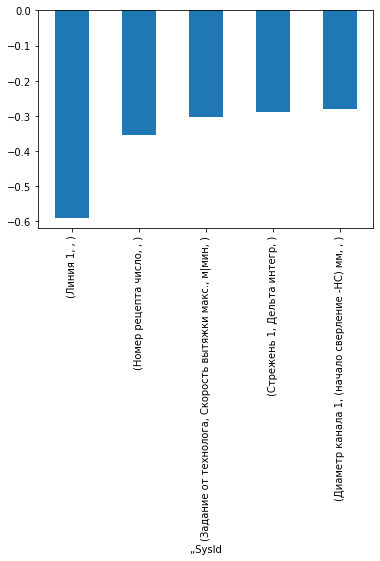

In [73]:
minser.plot(kind = "bar")

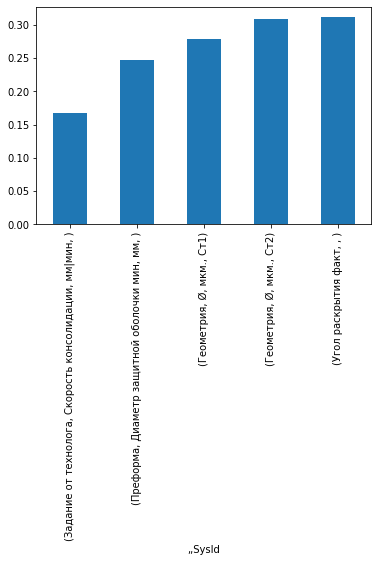

In [74]:
maxser.plot(kind = "bar")

Таким образом, наибольшее влияние на двулучепреломление оказывает тип станка, на котором произведены стержни, а так же рецепт по которому они произведены.

In [75]:
# resdatavit2 = resdatavit4.copy() # Блок автоматического удаления столбцов, если коэффициент корреляции больше 0.7
# a = True
# b = 0
# while a:
#     CMatr = resdatavit2.corr()
#     b = 0
#     exit = 0
#     for i in range(len(CMatr.columns.values)):
#         if exit == 1:
#             break
#         for j in range(len(CMatr.columns.values)):
#             if CMatr.iloc[i, j] >= 0.7:
#                 if CMatr.columns.values[i] == CMatr.columns.values[j]:
#                     pass
#                 else:
#                     print(CMatr.columns.values[i], " - ", CMatr.columns.values[j], "\n")
#                     resdatavit2 = resdatavit2.drop(columns = [CMatr.columns.values[i]])
#                     b = 1
#                     exit = 1
#                     break
#     if b == 0:
#         a = False

Блок работы модели

In [76]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [77]:
resdatavit2 = resdatavit2.drop(columns = ["Стержень 1", "Дата вытяжки", "Количество волокна снятого с процесса, м", 
                                         "Количество обрывов во время вытяжки, шт",
                                         "Количество зафиксированных (скачков) резких измененений скорости за время вытяжки",
                                         "Номер преформы"])

D:\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [78]:
resdatavit2 = resdatavit2.dropna()

In [79]:
resdataX = resdatavit2.drop(columns = ["Bmean"])

In [80]:
resdataY = resdatavit2["Bmean"]

In [81]:
XTrain, XTest, YTrain, YTest = train_test_split(resdataX, # Стандартный сплит
                                                     resdataY,
                                                     test_size = 0.2,
                                                     random_state = 42)

In [82]:
XTrain.to_excel("Proverka.xlsx")

In [83]:
model1 = LinearRegression().fit(XTrain, YTrain)

In [84]:
model1.score(XTrain, YTrain)

0.8962204752423053

In [85]:
model1.score(XTest, YTest)

0.6966129003079766

In [86]:
mean_squared_error(model1.predict(XTest), YTest)

0.02434667795567337

In [87]:
model1.predict(XTest)

array([7.36075432, 7.39025636, 7.55890472, 7.67972155, 7.26973164,
       7.3501198 , 6.9568038 , 6.93384887, 7.21355467, 6.95669459,
       7.3377503 , 7.55308903, 7.47852963, 7.3380372 , 7.42197964,
       7.30887654, 7.77899605, 7.40302898, 7.49111872, 6.9821657 ,
       7.45882362, 7.62119502, 7.04283901, 7.43396225, 7.39427245,
       7.35597543, 7.33839883, 7.24271847, 7.06999197, 7.14480409,
       7.18855412, 7.4637605 , 6.7034753 , 7.87584285, 7.37771275,
       7.43903488, 7.44855095, 6.95571536, 7.16180906, 7.50852918,
       7.36070372])

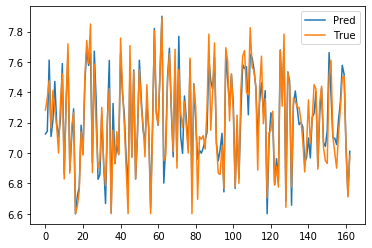

In [88]:
plt.plot(model1.predict(XTrain)) # Линейка трейн
plt.plot(YTrain.reset_index().drop(columns = ["index"]))
plt.legend(["Pred", "True"])

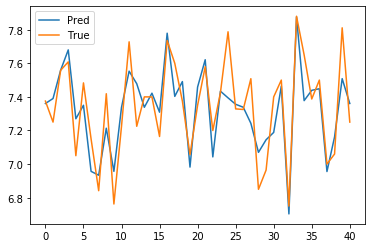

In [89]:
plt.plot(model1.predict(XTest)) # Линейка тест
plt.plot(YTest.reset_index().drop(columns = ["index"]))
plt.legend(["Pred", "True"])

In [90]:
model2 = Ridge().fit(XTrain, YTrain)

In [91]:
model2.score(XTrain, YTrain)

0.8174416346578837

In [92]:
model2.score(XTest, YTest)

0.5788340384594667

In [93]:
mean_squared_error(model2.predict(XTest), YTest)

0.03379837851354915

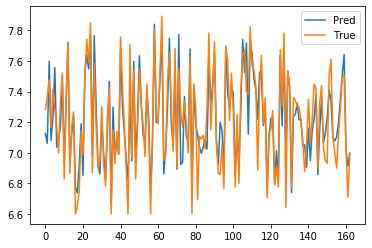

In [94]:
plt.plot(model2.predict(XTrain)) # Ридж, трейн
plt.plot(YTrain.reset_index().drop(columns = ["index"]))
plt.legend(["Pred", "True"])

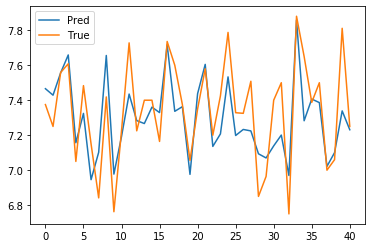

In [95]:
plt.plot(model2.predict(XTest)) # Ридж, тест
plt.plot(YTest.reset_index().drop(columns = ["index"]))
plt.legend(["Pred", "True"])

In [102]:
from sklearn.linear_model import Lasso
model3 = Lasso(alpha=0.01)
model3.fit(XTrain, YTrain)
model3.score(XTrain, YTrain)

0.7322341931623984

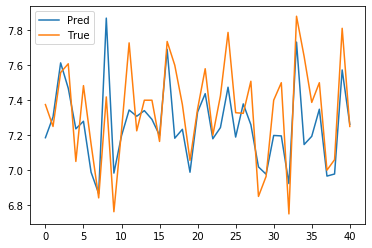

In [103]:
plt.plot(model3.predict(XTest)) # Ридж, тест
plt.plot(YTest.reset_index().drop(columns = ["index"]))
plt.legend(["Pred", "True"])

In [104]:
model3.coef_

array([-0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.00473739, -0.        ,  0.        ,  0.        ,
        0.03858798,  0.02345868, -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.20225476, -0.00050691,
       -0.        , -0.00393548,  0.00497714,  0.        ,  0.        ,
       -0.        , -0.00027249,  0.        , -0.01329037, -0.        ,
       -0.        ,  0.        , -0.00111436,  0.00123896, -0.        ,
       -0.00278856, -0.        ,  0.        ,  0.        ,  0.0043236 ,
        0.01201967, -0.0065833 ,  0.        ,  0.000662  ,  0.        ,
        0.        , -0.00097766, -0.        , -0.00174399, -0.        ,
       -0.        , -0.00031836, -0.00047965,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.  

In [110]:
coefs = model3.coef_
truecoefs = []
truecols = []
for i in range(len(coefs)):
    if coefs[i] != 0:
        print(XTest.columns.values[i], " - ", coefs[i])
        truecoefs.append(coefs[i])
        truecols.append(XTest.columns.values[i])

('Геометрия', 'Некруглость, %', 'Сердц')  -  -0.004737389396633179
('Геометрия', 'Ø, мкм.', 'Ст2')  -  0.038587977365669275
('Геометрия', 'Некр.,%', 'Ст1')  -  0.023458679306771434
('Линия 1', '', '')  -  -0.2022547602969791
('Задание от технолога', 'Температура консолидации', '')  -  -0.0005069149951432245
('Задание от технолога', 'Т съема капли', '')  -  -0.00393547643444571
('Задание от технолога', 'Разряжение при вытяжке, кПа', '')  -  0.004977143626733702
('Задание от технолога', 'Скорость вытяжки макс., м|мин', '')  -  -0.0002724876465118756
('Задание от технолога', 'Диаметр фильеры выходной 2, мкм', '')  -  -0.01329037165081803
('Задание от технолога', 'Длина заготовки общая, мм', '')  -  -0.001114362677651809
('Задание от технолога', 'Длина заготовки по длине стержней, мм', '')  -  0.0012389576286800164
('Скорость вытяжки сред.,м|мин', '', '')  -  -0.0027885550602882816
('Диаметр по кварцу макс,мм', '', '')  -  0.00432360471079989
('Натяжение волокна мин, гр', '', '')  -  0.012

In [111]:
Xcols = [str(x) for x in truecols]

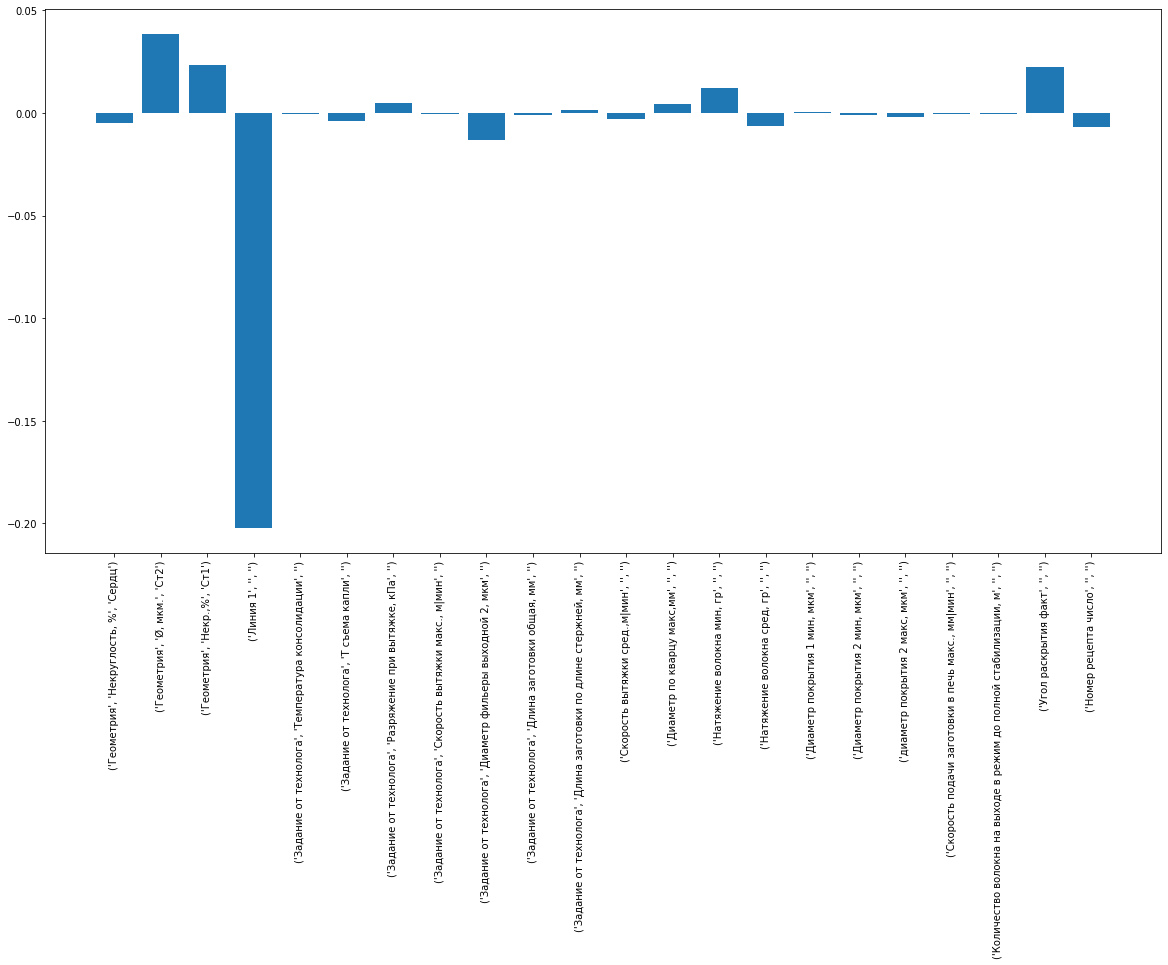

In [117]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(Xcols, truecoefs, orientation = 'vertical')
ax.tick_params(axis='x', rotation=90)

In [120]:
resultdf.to_excel(r'D:\Зубарев (D)\Git\Machine-learning-course-task\Project\resultdf.xlsx')
resultdf.to_csv(r'D:\Зубарев (D)\Git\Machine-learning-course-task\Project\resultdf.csv')
resultdf.to_csv(r'D:\Зубарев (D)\Git\Machine-learning-course-task\Project\resultdf2.csv', sep=';')